In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [11]:
df=pd.read_csv('attrition.csv')
df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,53,124,2,38,7525,23537,2,12,30,2,15,7,6,12,0
1,21,337,7,31,2679,4567,1,13,1,3,1,0,1,0,1
2,36,1218,9,82,3407,6986,7,23,10,4,5,3,0,3,1
3,38,1391,10,66,2684,12127,0,17,3,0,2,1,0,2,0
4,24,1476,4,42,4162,15211,1,12,5,3,5,4,0,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2233 non-null   int64
 1   DailyRate                2233 non-null   int64
 2   DistanceFromHome         2233 non-null   int64
 3   HourlyRate               2233 non-null   int64
 4   MonthlyIncome            2233 non-null   int64
 5   MonthlyRate              2233 non-null   int64
 6   NumCompaniesWorked       2233 non-null   int64
 7   PercentSalaryHike        2233 non-null   int64
 8   TotalWorkingYears        2233 non-null   int64
 9   TrainingTimesLastYear    2233 non-null   int64
 10  YearsAtCompany           2233 non-null   int64
 11  YearsInCurrentRole       2233 non-null   int64
 12  YearsSinceLastPromotion  2233 non-null   int64
 13  YearsWithCurrManager     2233 non-null   int64
 14  Attrition                2233 non-null   int64
dtypes: i

<AxesSubplot:>

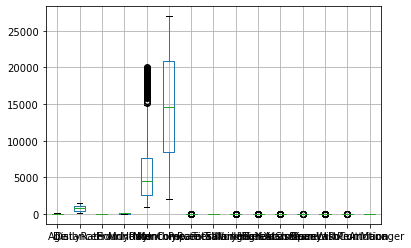

In [6]:
df.boxplot()

In [12]:
df.shape

(2233, 15)

In [13]:
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3-1.5*IQR

d1=df[~((df<ll)|(df>ul)).any(axis=1)]
d1.s

(0, 15)